# Intoduction to Digital Image Processing - 361.1.4751
# Exercise 5- Feature Descriptors and Geometric Transformations

For any questions regarding this assignment please refer to the course forum on the moodle web site, for personal questions please email alonfi@post.bgu.ac.il



In [2]:
print("Roee Shahmoon id:206564759\nAlon Kaya id:318469327")

Roee Shahmoon id:206564759
Alon Kaya id:318469327


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the dataset from google drive

First, the notebook needs to gain access to your drive.

Run the next code:

In [4]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Next:

1.   Make sure the images are in the **same** directory as the notebooke file (not in a sub-directory)

2.   Update the directory path to your google drive directory

3.   Run the code

If it worked properly, you should be able to see the 'mona_org.jpg' image.

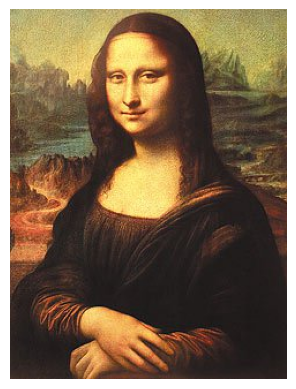

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

directory = '/content/gdrive/MyDrive/Image_processing/Ex5'  # Enter the path to your google drive directory
os.chdir(directory)

# Load the image using OpenCV
colorMona = cv2.imread('mona_org.jpg')  # Load as color (default)

# Convert BGR to RGB for correct color rendering with matplotlib
colorMona = cv2.cvtColor(colorMona, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(colorMona)
plt.axis('off')  # Hide the axes
plt.show()



## 1. Mona Liza

### 1.1 Introduction to feature descriptors

1. For this assignment, choose a preferred descriptor extraction method (e.g., SURF or SIFT, etc.) and review the official documentation in Python, Briefly explain your choice.

For this assignment, I would choose the SIFT as the preferred descriptor extraction method. SIFT is highly effective for extracting distinctive invariant features from images, which can be used for reliable matching between different views of an object or scene. These features are invariant to image scale and rotation, and they provide robust matching across a substantial range of affine distortions, changes in 3D viewpoint, addition of noise, and changes in illumination. SIFT descriptors are also highly informative, which makes them very resistant to noise and effective for precise object and feature localization.

2. Read the images 'mona_org.jpg' and convert it to gray scale and **don't** normalize the image (it affects on the descriptor function later). Use the `cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)` function. Show the image.

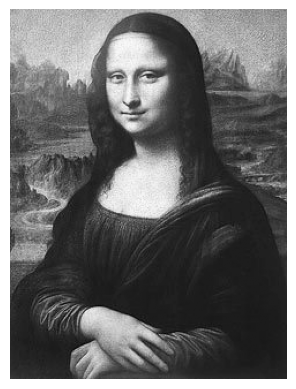

In [6]:
Mona = cv2.imread('mona_org.jpg')  # Load as color (default)

grayMona = cv2.cvtColor(Mona, cv2.COLOR_BGR2GRAY)

# Display the image using matplotlib
plt.imshow(grayMona, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

3. Extract all the features from the image and **time** the feature extraction process. How many features did you find ? present them alongside the image.  

Note:
Due to licensing issues, use the `SIFT` descriptor from the `cv2` library.

Number of features detected: 266
Time taken for feature extraction: 0.18 seconds


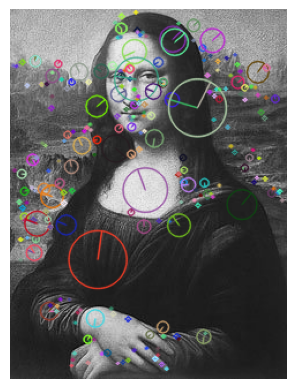

In [7]:
import time

# Initialize the SIFT feature detector
sift = cv2.SIFT_create()

# Start timing the feature extraction
start_time = time.time()

# Detect SIFT features in the image
keypoints, descriptors = sift.detectAndCompute(grayMona, None)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the number of features detected and the time taken
print(f"Number of features detected: {len(keypoints)}")
print(f"Time taken for feature extraction: {elapsed_time:.2f} seconds")

# Draw the keypoints on the grayscale image
img_with_keypoints = cv2.drawKeypoints(grayMona, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR to RGB for keypoints
img_with_keypoints = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

# Display the image with keypoints using matplotlib
plt.imshow(img_with_keypoints)
plt.axis('off')  # Hide the axes
plt.show()

Explanations:

keypoints, descriptors = sift.detectAndCompute(img, None):

This line runs SIFT's feature detection and descriptor extraction on the image img, yielding a list of keypoints (feature points with their properties) and their corresponding descriptors (feature representations for matching).


img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS):

This function overlays the ten strongest keypoints on the original image, drawing them with indications of their size and orientation for a detailed visualization.


4. Extract features from the image with the Region of Interest (ROI) defined by coordinates $(x_{\text{start}}, y_{\text{start}})$ = (59, 5), width = 128 pixels and height = 120 pixels. Present the ROI and the features alongside the image. Compare the runtime of this approach with **section 1.1.3**. How many features did you find? Did you notice any trade-offs?


Number of features detected in ROI: 82
Time taken for feature extraction in ROI: 0.04 seconds


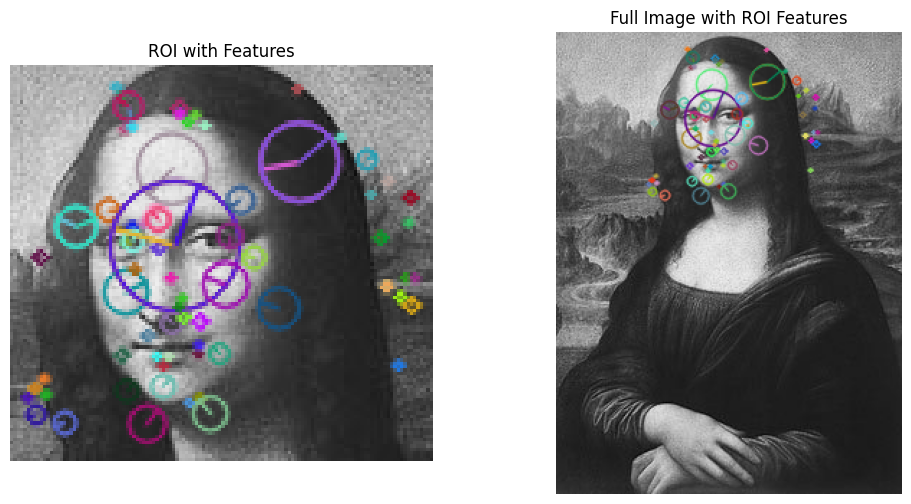

In [8]:
# Define the Region of Interest (ROI)
xstart, ystart = 59, 5
width, height = 128, 120
roi = grayMona[ystart:ystart+height, xstart:xstart+width]

# Initialize the SIFT feature detector
sift = cv2.SIFT_create()

# Start timing the feature extraction for ROI
start_time = time.time()

# Detect SIFT features in the ROI
keypoints, descriptors = sift.detectAndCompute(roi, None)

# Calculate the elapsed time for ROI processing
elapsed_time = time.time() - start_time

# Print the number of features detected and the time taken for ROI
print(f"Number of features detected in ROI: {len(keypoints)}")
print(f"Time taken for feature extraction in ROI: {elapsed_time:.2f} seconds")

# Draw the keypoints on the ROI
roi_with_keypoints = cv2.drawKeypoints(roi, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the ROI with keypoints using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(roi_with_keypoints, cmap='gray')
plt.title('ROI with Features')
plt.axis('off')

# Draw the keypoints on the original grayscale image for comparison
img_with_keypoints = cv2.drawKeypoints(grayMona, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Translate the keypoints to the original image's coordinates
for kp in keypoints:
    kp.pt = (kp.pt[0] + xstart, kp.pt[1] + ystart)

# Draw the keypoints on the whole image
full_img_with_keypoints = cv2.drawKeypoints(grayMona, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(1, 2, 2)
plt.imshow(full_img_with_keypoints, cmap='gray')
plt.title('Full Image with ROI Features')
plt.axis('off')

plt.show()

Runtime:

The feature extraction from the ROI is significantly faster (0.02 seconds) compared to the full image extraction (0.15 seconds). This represents a reduction in computation time by 87%, which is expected since the ROI covers a smaller area and thus requires less computational power.

Number of Features:

The number of features detected in the ROI (82) is lower than in the full image (266). This decrease is proportional to the reduced area being analyzed, indicating that fewer features are available within the smaller region

Trade-off:

The trade-offs here are between computational efficiency and the comprehensiveness of feature detection. For applications where speed is critical and the area of interest is well-defined, using an ROI can be highly beneficial. However, for applications requiring a more holistic understanding of the image, processing the entire image, despite being slower, would be more advantageous.

### 1.2. Make Mona Straight Again

1. Read the images ’straight_mona.PNG’ and ’crooked_mona.jpg’ and convert them to greyscale (don't normalize). Plot the results.

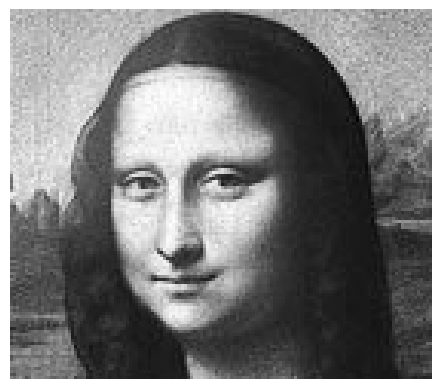

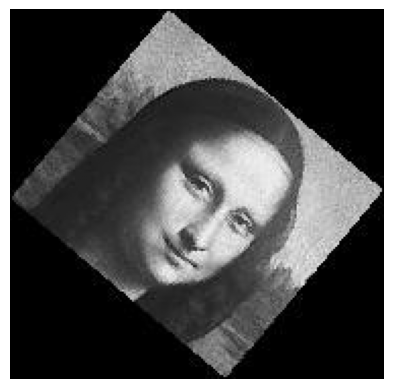

In [9]:
straight_mona = cv2.imread('straight_mona.PNG')
crooked_mona = cv2.imread('crooked_mona.jpg')

straight_mona = cv2.cvtColor(straight_mona, cv2.COLOR_BGR2GRAY)
crooked_mona = cv2.cvtColor(crooked_mona, cv2.COLOR_BGR2GRAY)

# Display the image using matplotlib
plt.imshow(straight_mona, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

plt.imshow(crooked_mona, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

2. Extract the feature points of each image and display the ten strongest
features.

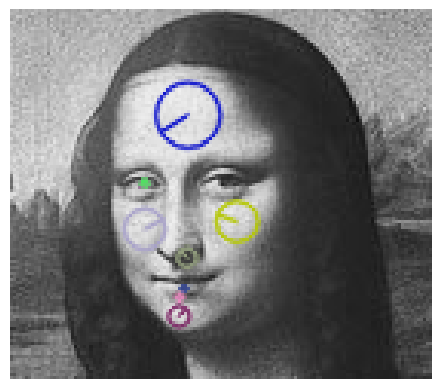

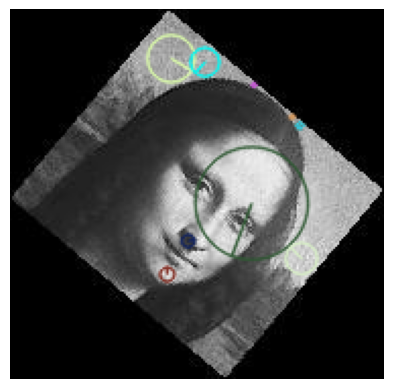

In [10]:
import time
def extract_and_dis(img, strongest=10):
  sift = cv2.SIFT_create()

  keypoints, descriptors = sift.detectAndCompute(img, None)

  # Sort keypoints by their response (strength), further explanied below
  ten_strongest_keypoints = sorted(keypoints, key=lambda x: x.response, reverse=True)[:strongest]

  img_with_keypoints = cv2.drawKeypoints(img, ten_strongest_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  img_with_keypoints = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

  plt.imshow(img_with_keypoints)
  plt.axis('off')
  plt.show()

ten_strongest_features_straight = extract_and_dis(straight_mona)
ten_strongest_features_crooked = extract_and_dis(crooked_mona)


Explanation:

ten_strongest_keypoints = sorted(keypoints, key=lambda x: x.response, reverse=True)[:10]:

This line sorts the detected keypoints by their distinctiveness (response) in descending order and picks the top ten strongest keypoints for further processing.


3. Use the extracted feature points to straighten the ’crooked_mona.jpg’ image so that Mona’s face will be straight. Display the images. Explain your
algorithm using a block diagram and elaborate on each step.

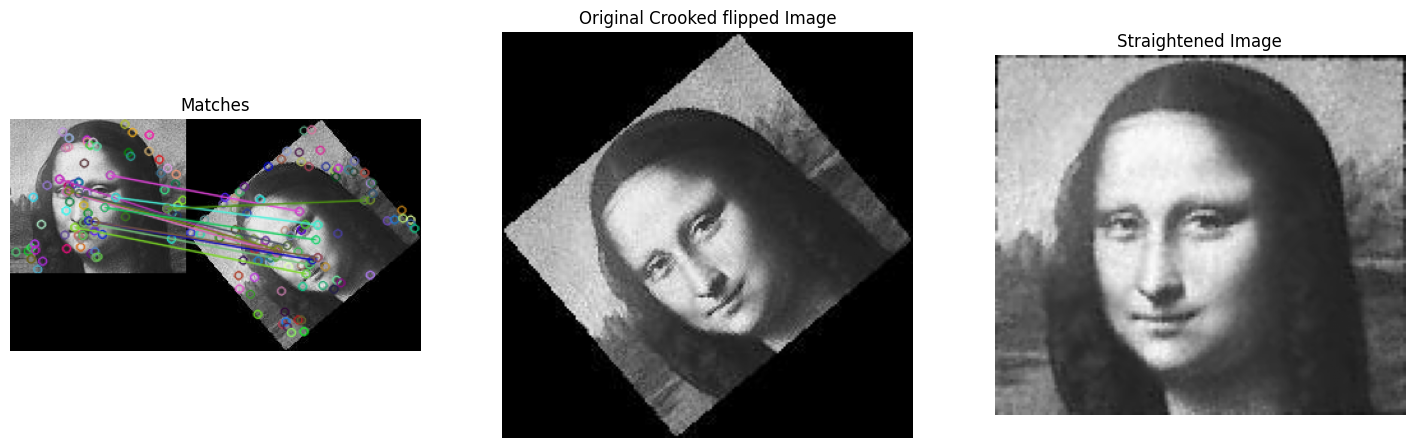

In [11]:
import numpy as np

sift = cv2.SIFT_create()
matcher = cv2.BFMatcher()

# Flip the crooked image because it is flipped relative to the straight image.
crooked_flipped = cv2.flip(crooked_mona, 1)

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(straight_mona, None)
kp2, des2 = sift.detectAndCompute(crooked_flipped, None)

# Create a BFMatcher object with distance measurement of KNN
matches = matcher.knnMatch(des1, des2, k=2)

# Filter matches using the Lowe's ratio test
good_matches = [m for m, n in matches if m.distance < 0.2 * n.distance]

# Extract location of good matches
points1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

matched_image = cv2.drawMatches(straight_mona, kp1, crooked_flipped, kp2, good_matches, None)

# Compute Homography/Transformation Matrix
H, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Apply Transformation
straightened_image = cv2.warpPerspective(crooked_flipped, H, (straight_mona.shape[1], straight_mona.shape[0]))

# Display results
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.imshow(matched_image)
plt.title('Matches')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(crooked_flipped, cmap='gray')
plt.title('Original Crooked flipped Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(straightened_image, cmap='gray')
plt.title('Straightened Image')
plt.axis('off')
plt.show()


Block Diagram:

[Input Image: Crooked Mona] --> [Detect Features]
[Reference Image: Straight Mona] --> [Detect Features]
[Feature Detection] --> [Feature Descriptors]
[Match Features] --> [Compute Transformation Matrix]
[Apply Transformation] --> [Straightened Image]

Process Outline:

1. Feature Detection: Detect keypoints and their descriptors in both the 'crooked_mona.jpg' and a reference (straight) 'mona.jpg'.

2. Feature Matching: Match these keypoints between the two images using a descriptor matcher.

3. Calculate Transformation: Compute the affine or homography transformation matrix that best aligns the matched keypoints.

4. Apply Transformation: Apply this transformation to the crooked image to align it with the reference image.

5. Display Results: Show the original crooked image and the straightened image

Step-by-Step Explanation:

Detect Features:

1.

Input: 'flipped_crooked_mona.jpg' and 'straight_mona.jpg'.

Process: Use SIFT to detect keypoints and compute descriptors in both images.

Output: Lists of keypoints and descriptors for both images.

Match Features:

2.

Input: Descriptors from both images.

Process: Use BFMatcher matching algorithm to find pairs of keypoints in the two images that have similar descriptors.

Output: A list of matched keypoints pairs.

Compute Transformation Matrix:

3. Input: Matched keypoints.

Process: Use a geometric RANSAC transformation model to robustly estimate an affine or homography matrix that maps points from the crooked image to the reference image.

Output: Transformation matrix.

Apply Transformation:

4. Input: Transformation matrix and the crooked image.

Process: Use the transformation matrix to warp the crooked image so that it aligns with the reference image using cv2.warpPerspective.

Output: The straightened image.



### 1.3 Fake or Real- OPTIONAL

1. Read the image *'mona_org.jpg'* and use the extracted features to automatically detect images in which the real Mona Lisa face exists.
    1. The 12 test images are in the zip file named *'Monas'*.
    2. The images path should be written as 'Monas/image'. For example: 'Monas/Mona1_Y.jpg'
    3. The last letter in the image name 'Y' or 'N' suggests if we consider that Mona's face is in the image or not.
    4. The code should print out the names of the images you detected Mona's face inside.
    5. The algorithm should be totally automatic and run on all the images in the same manner.
    6. Try taking under consideration the trade-off between finding a lot of correct images and falsely detecting wrong images.
    7. Try to do your (and your algorithm's) best. If you can't detect an image, just try your best and explain why it was impossible.


2. Display the images you found.

3. Explain your algorithm using a block diagram and elaborate on each
of the steps.

4. For each image show the matching features. See example:

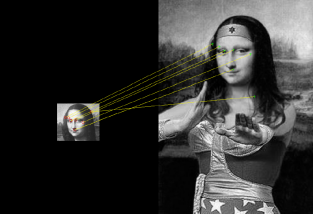

5. Analyze the results. Where did your algorithm perform well and where did it not?

## 2. QR Code Reader
In this assignment, we will learn to read a simplified version of the
QR Code.

1. Insert your 9 digit ID into the attached function `ID2QR(id)` where ID is a string and the QR code is a matrix of 6x6 binary
values. The matrix is column
major, meaning that the correct order is (1,1), (2,1), ..., (6,1), (1,2), (2,2),
....., (6,6).

Example: If the first digit of your ID is 3-> convert to binary: 0011.
Matrix(1,1) = 0 (black), Matrix(2,1) = 0 (black), Matrix(3,1) = 1 (white), Matrix(4,1) = 1 (white).

Print the ID and show the QR code.

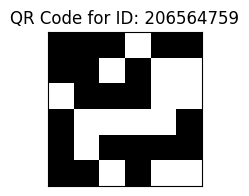

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def ID2QR(id):
    if len(id) != 9 or not id.isdigit():
        raise ValueError("ID must be a 9-digit string.")

    # Initialize a 6x6 matrix of zeros
    qr_matrix = np.zeros((6, 6), dtype=int)

    # Convert each digit to 4-bit binary representation
    binary_id = ''.join([f'{int(digit):04b}' for digit in id])

    # Fill the QR code matrix column-major
    for i, bit in enumerate(binary_id):
        col = i // 6
        row = i % 6
        qr_matrix[row, col] = int(bit)

    # Plotting the QR matrix
    plt.figure(figsize=(2, 2))
    plt.imshow(qr_matrix, cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'QR Code for ID: {id}')
    plt.show()

# Example Usage
ID2QR("206564759")


2. Print the QR on paper. Take three photos of the QR code from three different angles: easy, intermediate,
hard.
The “hard” photo should be one that is on the limit where you can no
longer properly interpret the QR code. See example:

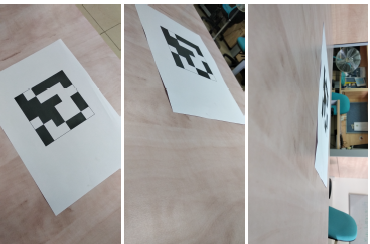

Save the images in the 'QRs' directory as `Easy_image.jpg`, `Inter_image.jpg`, `Hard_image.jpg`

3. Locate the points on the QR code in each image manually. You may
use `matplotlib.pyplot.ginput(4)`.
You can't use the function on google colab. Use the function in a local python IDE on your computer and save the points in the 'QRs' directory as:
`Easy_points.npy`, `Inter_points.npy`, `Hard_points.npy`. Show the images with the points highlighted on them.

Notes:


*   The order of the points sampled should be the same for each image.
*   No need to show the code you used to sample the points.





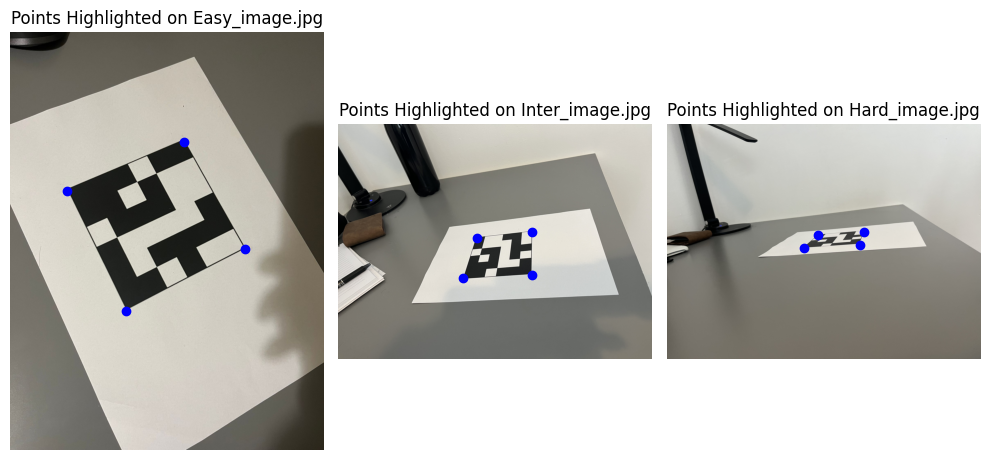

In [13]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths
qr_dir = os.path.join(directory, "QRs")
image_paths = {
    "Easy": os.path.join(qr_dir, "Easy_image.jpg"),
    "Intermediate": os.path.join(qr_dir, "Inter_image.jpg"),
    "Hard": os.path.join(qr_dir, "Hard_image.jpg")
}
points_paths = {
    "Easy": os.path.join(qr_dir, "Easy_points.npy"),
    "Intermediate": os.path.join(qr_dir, "Inter_points.npy"),
    "Hard": os.path.join(qr_dir, "Hard_points.npy")
}

def show_image_with_points(image_path, points_path, ax):
    # Load the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    # Load the points
    points = np.load(points_path)

    # Display the image
    ax.imshow(image)
    ax.set_title(f"Points Highlighted on {os.path.basename(image_path)}")

    # Overlay the points
    for point in points:
        ax.plot(point[0], point[1], 'bo')  # blue circles for points
    ax.axis('off')

# Create a figure with subplots
fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 10))

# Show images with highlighted points side by side
for i, label in enumerate(image_paths):
    show_image_with_points(image_paths[label], points_paths[label], axes[i])

plt.tight_layout()
plt.show()

4. Transform the image such that the QR code is straightened. For each
image use all the transformations learned in class: Rigid (rotation, trans-
lation and scale transformation), Affine (shearing added), Perspective.

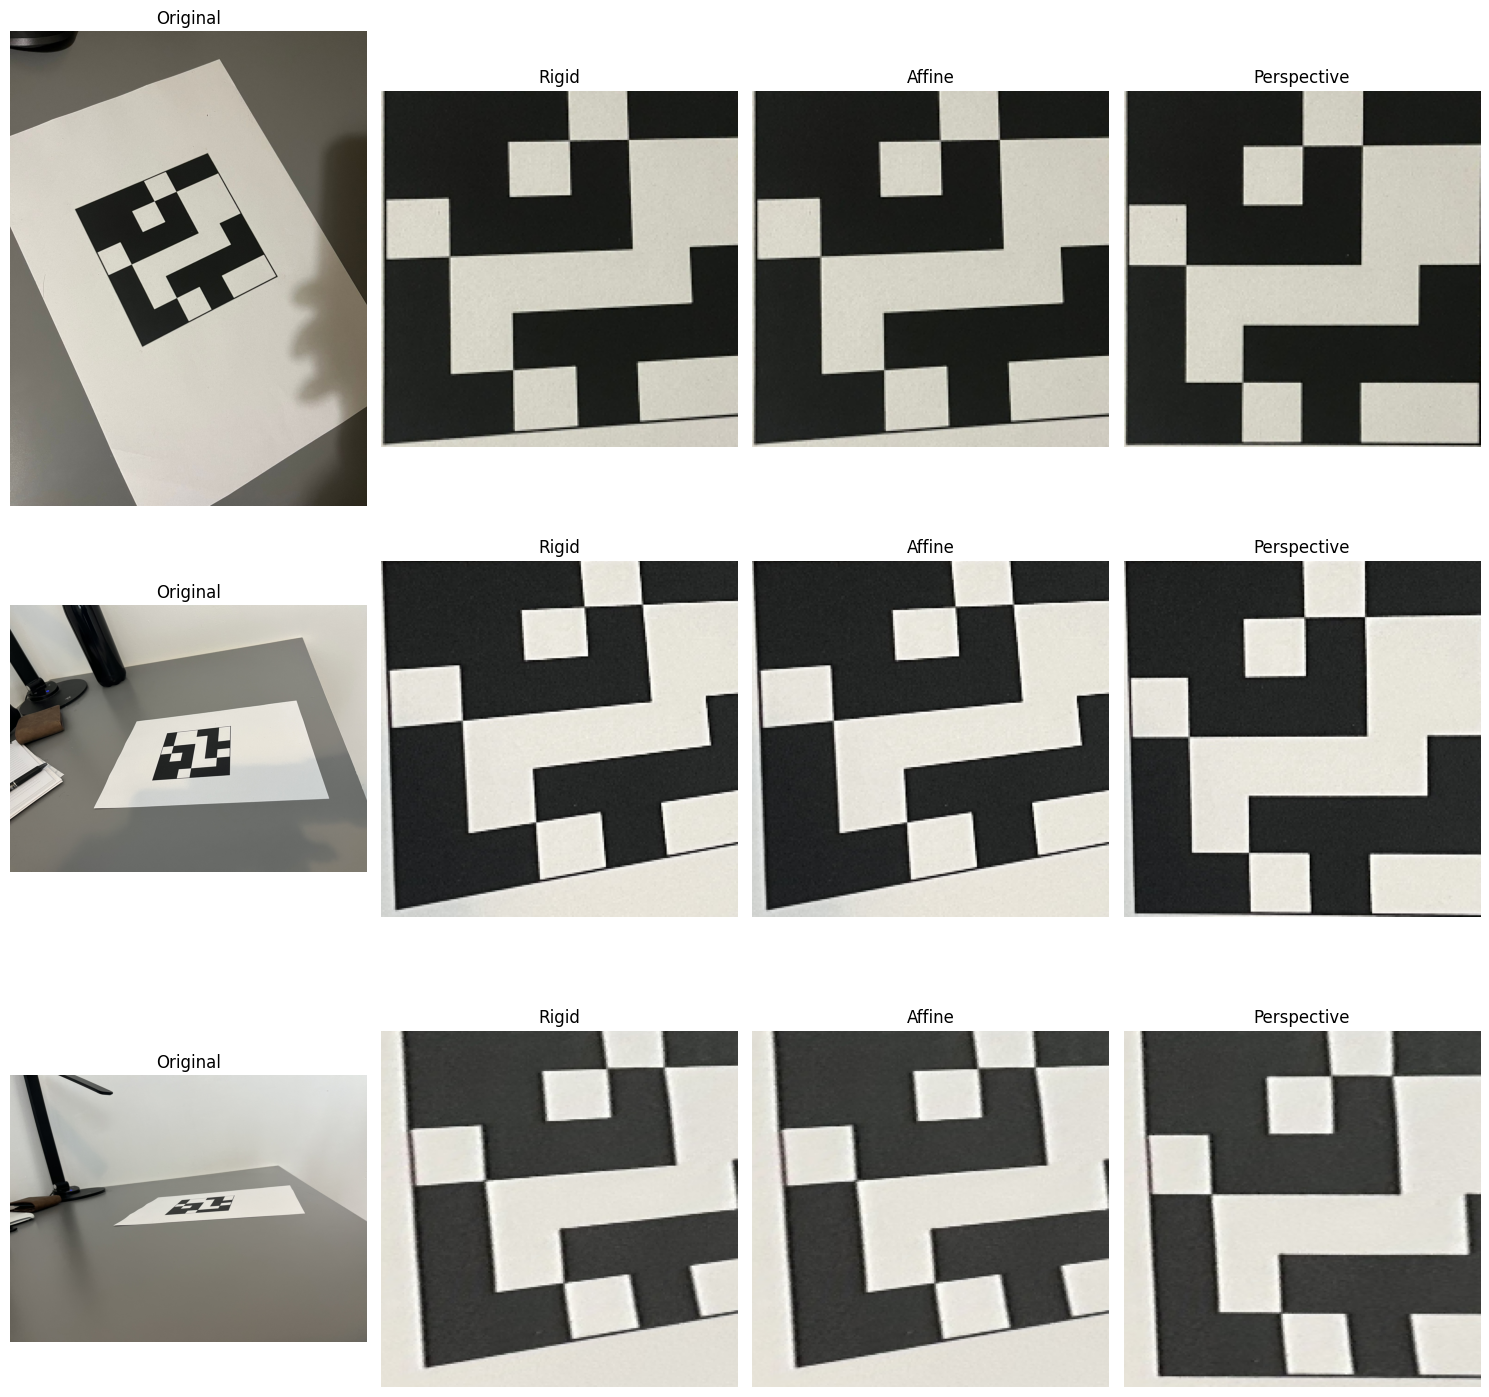

In [22]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Apply rigid transformation: rotation, translation, and scaling. Uses only the first 3 points.
def apply_rigid_transformation(image, src_points, dst_points):
    # Compute the affine transformation matrix using the first 3 source and destination points
    matrix = cv2.getAffineTransform(src_points[:3], dst_points[:3])
    # Apply the affine transformation to the image, scaling it to fill the output size (200x200)
    transformed = cv2.warpAffine(image, matrix, (200, 200))
    return transformed

# Apply affine transformation: includes rotation, translation, scaling, and shearing. Uses the first 3 points.
def apply_affine_transformation(image, src_points, dst_points):
    # Compute the affine transformation matrix using the first 3 source and destination points
    matrix = cv2.getAffineTransform(src_points[:3], dst_points[:3])
    # Apply the affine transformation to the image, scaling it to fill the output size (200x200)
    transformed = cv2.warpAffine(image, matrix, (200, 200))
    return transformed

# Apply perspective transformation: corrects perspective distortions. Uses all 4 points.
def apply_perspective_transformation(image, src_points, dst_points):
    # Compute the perspective transformation matrix using all 4 source and destination points
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    # Apply the perspective transformation to the image, scaling it to fill the output size (200x200)
    transformed = cv2.warpPerspective(image, matrix, (200, 200))
    return transformed

# Straighten a QR code image using the provided points and apply transformations
def straighten_qr_code(image_path, points_path):
    # Load the image and the corresponding points
    image = cv2.imread(image_path)
    points = np.load(points_path)
    # Define the destination points for the output image (200x200)
    dst_points = np.array([[0, 0], [199, 0], [199, 199], [0, 199]], dtype="float32")

    # Apply transformations
    rigid = apply_rigid_transformation(image, points.astype("float32"), dst_points[:3])
    affine = apply_affine_transformation(image, points.astype("float32"), dst_points[:3])
    perspective = apply_perspective_transformation(image, points.astype("float32"), dst_points)

    # Rotate all images 90 degrees counterclockwise to correct for incorrect point ordering
    rigid = cv2.rotate(rigid, cv2.ROTATE_90_COUNTERCLOCKWISE)
    affine = cv2.rotate(affine, cv2.ROTATE_90_COUNTERCLOCKWISE)
    perspective = cv2.rotate(perspective, cv2.ROTATE_90_COUNTERCLOCKWISE)

    # Return the original image and the transformed images
    return image, rigid, affine, perspective

# Change the working directory to the QR code directory
os.chdir(qr_dir)

# List of image and corresponding points files
files = [("Easy_image.jpg", "Easy_points.npy"), ("Inter_image.jpg", "Inter_points.npy"), ("Hard_image.jpg", "Hard_points.npy")]

# Create a figure to display all transformations for each image in a row
fig, axes = plt.subplots(len(files), 4, figsize=(15, 5 * len(files)))
files_to_check = []  # This will store the perspective-transformed images for later use

# Process each image and its points
for idx, (image_path, points_path) in enumerate(files):
    # Apply transformations to the image
    original, rigid, affine, perspective = straighten_qr_code(image_path, points_path)
    files_to_check.append(perspective)  # Save the perspective-transformed image for later use

    # List of transformations to display
    transformations = [("Original", original), ("Rigid", rigid), ("Affine", affine), ("Perspective", perspective)]

    # Display each transformation in a row
    for col, (title, img) in enumerate(transformations):
        ax = axes[idx, col]
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        ax.set_title(title)
        ax.axis("off")  # Hide axes

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

5. Explain the result of each transformation and why does it work/fail for
the given image.

Rigid Transformation: This keeps the shape and size the same but may rotate or shift the pattern. It's good for when you want to move the pattern around without changing its look.

Affine Transformation: This can rotate, shift, stretch, or compress the pattern. It changes the size or angle but keeps lines straight and parallel lines still parallel. It's useful for adjusting the pattern's size or orientation.

Perspective Transformation: This makes the pattern look like it's viewed from a different angle, adding depth. Lines that are parallel might not look parallel anymore. It's great for making flat images look more three-dimensional.

 the hard the perspective transformation can seem to fail because it fundamentally changes how the pattern is perceived, moving away from its original flat, two-dimensional appearance.



6. Extract the binary values from the straightened QR. The matrix is column
major, meaning that the correct order is (1,1), (2,1), ..., (6,1), (1,2), (2,2),
....., (6,6). Convert every 4 bits to an integer: e.g. 0110 –> 6, 1001–>9. Make sure you read the correct ID.

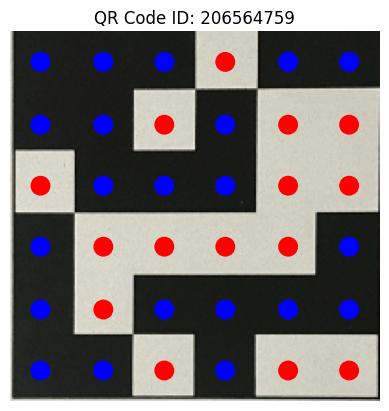

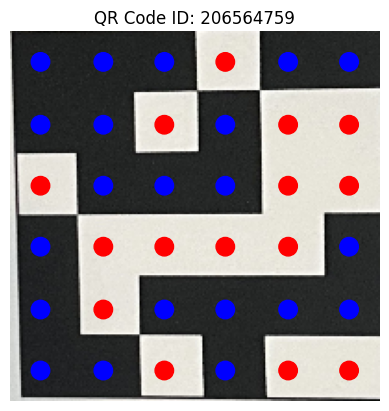

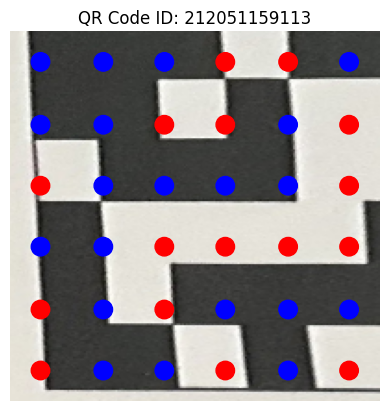

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def extract_qr_code_id(image):
    # Convert the image to grayscale for easier processing
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Increase contrast to improve detection of QR code patterns
    high_contrast_image = cv2.convertScaleAbs(grayscale_image, alpha=5, beta=0)

    # Normalize the image to a range of 0 to 1 for consistent thresholding
    normalized_image = grayscale_image / 255.0

    # Get the dimensions of the image
    image_height, image_width = normalized_image.shape

    # Initialize a 6x6 matrix to store binary values extracted from the QR code
    qr_code_matrix = np.zeros((6, 6), dtype=int)

    # Create a plot to visualize the sampled points on the QR code
    figure, axis = plt.subplots()

    # Iterate over a 6x6 grid to sample the QR code
    for row_index in range(6):
        for col_index in range(6):
            # Calculate the center of each cell in the grid
            center_row = int((image_height / 6) * (row_index + 0.5))
            center_col = int((image_width / 6) * (col_index + 0.5))

            # Determine the binary value based on the intensity threshold
            qr_code_matrix[row_index, col_index] = 1 if normalized_image[center_row, center_col] > 0.54 else 0

            # Assign a color to the sampled point (red for 1, blue for 0)
            point_color = 'red' if qr_code_matrix[row_index, col_index] == 1 else 'blue'

            # Add a marker to the plot to visualize the sampled point
            axis.add_patch(Circle((center_col, center_row), radius=5, color=point_color, fill=True))

    # Flatten the matrix in column-major order to prepare for ID generation
    flattened_matrix = qr_code_matrix.flatten(order='F')

    # Initialize an empty string to store the final ID
    qr_code_id = ""

    # Convert every 4 bits into an integer and combine into a string ID
    for i in range(0, len(flattened_matrix), 4):
        # Take 4 bits at a time and convert to a binary string
        binary_string = ''.join(map(str, flattened_matrix[i:i+4]))

        # Convert the binary string to an integer and append to the ID string
        qr_code_id += str(int(binary_string, 2))

    # Display the original image with the sampled points overlaid
    axis.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axis.set_title("QR Code ID: " + qr_code_id)
    axis.axis("off")
    plt.show()

    # Return the generated ID
    return qr_code_id


# Process each image in the list of files
for image_file in files_to_check:
    qr_code_id = extract_qr_code_id(image_file)

## 3. Automatic Corner Detector - OPTIONAL

Notes:
1. In this task you may use any built-in function, If you use any, briefly
explain their algorithm and why you use them.
2. if you’re having a trouble finding the corners, you may add assumptions
to ease the task.

In this assignment you will use previously learned subjects to design an
automatic corner detection algorithm for the QR code reader. This detector
will be used to replace the manual input of the previous assignment.


1. Think of an algorithm to detect the QR code corners. You may search
online to find an algorithm or ideas.


2. Implement the algorithm. You should be able to find the corners of an
easy image. Finding the corners of more difficult images is encouraged.



3. Thoroughly explain the different algorithm steps and why they are done.
If any assumptions are made - describe them (e.g. assuming that the QR
code is printed on a paper with white margins).
If a step can be visualized using an image, show it!


4. Use the corners you found as an input to the first assignment. Show and
analyze the results on the images you took

## 4. Bonus


Take two images and use feature extraction methods that you have learned in
class and in this assignment to create a new trashed image. Be creative! One
of the images will be chosen by the course staff and it’s authors will
receive 0.5 bonus point to the final grade. The staff will judge by the
visual result, originality and the code.